<a href="https://colab.research.google.com/github/anaramos5582/bootcamp-womakerscode/blob/main/Notebook_Enem_AnaPaulaBarrosRamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Womakers Code - Bootcamp Data Analytics 2024
### Estatística Frequências e Medidas
#### by Ana Paula Barros Ramos

### Sobre a Fonte de Dados
Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).
Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

### Pré-Requisitos
1. Qual das disciplinas tem a maior amplitude de nota?
2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)
3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?
4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?
5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?
Da engenharia à liderança, conectamos mulheres
que querem fazer a diferença
na tecnologia e inovação.
womakerscode.org
6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?
7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.
9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)
10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

## Instalando e Carregando os Pacotes

In [ ]:
# Versão do Python
from platform import python_version
print (python_version())

3.10.12


In [ ]:
# Importando as bibliotecas

# Manipulação de Dados
import pandas as pd
import numpy as np
from google.colab import files

# Visualizações
from matplotlib import pyplot as plt
import seaborn as sns

### Carregando os Dados

In [ ]:
# upload do arquivo que contém os dados
uploaded = files.upload()

Saving enem_2023.json to enem_2023 (1).json


In [ ]:
# Carregando o dataset
df_enem = pd.read_json('enem_2023.json')
df_enem

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


### Análise Exploratória dos Dados

In [ ]:
# Analisando os tipos de variáveis e a existência de valores nulos
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
# Visualizando os valores únicos da única variável categórica
df_enem.Sexo.unique()

array(['Homem', 'Mulher', 'Não idenficado'], dtype=object)

#### Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
df_enem.describe().T

,count,mean,std,min,25%,50%,75%,max
Linguagens,897.0,514.524809,84.009313,287.000000,458.360558,515.045250,571.635876,804.456317
Ciências humanas,936.0,527.042281,77.811519,289.900000,475.424546,524.519920,581.401952,763.919695
Ciências da natureza,824.0,499.315583,78.760404,314.400000,444.709076,500.479263,548.751678,802.004568
Matemática,924.0,535.965660,86.648100,319.800000,479.172971,533.247767,592.912963,807.877902
Redação,860.0,637.783532,115.339972,270.839965,556.468366,635.273973,715.989868,1000.000000


In [ ]:
# Função para calcular amplitude
def func_calcula_amplitude(var):
  return var.max() -  var.min()

In [ ]:
# Selecionando as colunas não categóricas
colunas_numericas = df_enem.select_dtypes(exclude=['object']).columns
colunas_numericas

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação'],
      dtype='object')

In [ ]:
# Aplicando a função que calcula a amplitude para todas as variáveis não categóricas
amplitudes = df_enem[colunas_numericas].apply(func_calcula_amplitude).sort_values(ascending=False)
amplitudes

Redação                 729.160035
Linguagens              517.456317
Matemática              488.077902
Ciências da natureza    487.604568
Ciências humanas        474.019695
dtype: float64

In [ ]:
print('A disciplina', amplitudes.index[0], 'tem a maior amplitude de nota.')

A disciplina Redação tem a maior amplitude de nota.


#### Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Calculando a média para as colunas não categóricas
df_final = df_enem[colunas_numericas].mean()
df_final.columns=['Disciplina','Media']
df_final

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [ ]:
# Calculando a mediana para as colunas não categóricas, não considerando os valores nulos
df_limpo= df_enem[colunas_numericas].median(skipna=True)

In [ ]:
df_limpo.columns=['Disciplina','Mediana']
df_limpo

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

In [ ]:
# Concatenando os dataframes calculados para melhor comparação
df_media_mediana = pd.concat([df_final,df_limpo],axis=1)
df_media_mediana = df_media_mediana.rename(columns = {0:"Média",1:"Mediana"})
df_media_mediana

,Média,Mediana
Linguagens,514.524809,515.045250
Ciências humanas,527.042281,524.519920
Ciências da natureza,499.315583,500.479263
Matemática,535.965660,533.247767
Redação,637.783532,635.273973


#### 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso de cada uma das disciplinas ponderado:
 a. Redação - 2;
 b. Matemática e suas Tecnologias - 4
 c. Linguagens, Códigos e suas Tecnologias - 2
 d. Ciências Humanas e suas Tecnologias - 1,
 e. Ciências da Natureza e suas Tecnologias - 1.
 Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
# Cópia do dataframe original e cálculo da média ponderada
df_enem_ufpe=df_enem.copy()
df_enem_ufpe['Ponderada']=(df_enem['Linguagens']*2 + df_enem['Ciências humanas']*1 +df_enem['Ciências da natureza']*1 + df_enem['Matemática']*4 + df_enem['Redação']*2)/10
df_enem_ufpe.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher,NaN
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem,571.021214
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher,482.053143
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher,531.431989
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher,NaN
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher,NaN


In [ ]:
# Filtrando os 500 estudantes com maior média ponderada
df_enem_500 = df_enem_ufpe.sort_values('Ponderada', ascending=False)[:500].reset_index()
df_enem_500

,index,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Ponderada
0,25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
1,824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
2,702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
3,129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
4,60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...,...
495,400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,491.878059
496,160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,491.409454
497,529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,491.032952
498,386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,490.069750


In [ ]:
# Calculando a média e o desvio padrão para as disciplinas
df_enem_500.loc[:,"Linguagens":"Redação"].agg([np.mean,np.std]).T.rename(columns={"mean": "Média", "std": "Desvio Padrão"})

,Média,Desvio Padrão
Linguagens,522.839398,80.774298
Ciências humanas,529.920191,77.131378
Ciências da natureza,503.086728,78.613174
Matemática,547.407965,83.240776
Redação,652.289598,109.963819


#### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
# Filtrando os 40 primeiros dentre os 500 estudantes
df_enem_40 = df_enem_500.sort_values('Ponderada', ascending=False)[:40]
df_enem_40

,index,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Ponderada
0,25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
1,824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
2,702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
3,129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
4,60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
5,880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,658.561320
6,376,364.096042,582.024626,523.764760,749.912621,872.188740,Não idenficado,657.800943
7,989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem,648.021091
8,694,497.493880,609.839007,528.413513,737.175029,693.739043,Mulher,646.941848
9,965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,645.621045


In [ ]:
# Calculando a média e variância dos 40 estudantes com maiores médias ponderadas
df_enem_40.loc[:,"Linguagens":"Redação"].agg([np.mean, np.var]).T.rename(columns={"mean": "Média", "var": "Variância"})

,Média,Variância
Linguagens,586.276605,10535.667205
Ciências humanas,554.327484,6410.724088
Ciências da natureza,522.298209,5179.612094
Matemática,655.650831,6399.325107
Redação,747.522593,11030.278108


#### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# Calculando o terceiro quartil
df_enem[['Linguagens','Matemática']].quantile(0.75)

Linguagens    571.635876
Matemática    592.912963
Name: 0.75, dtype: float64

#### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

In [ ]:
# Filtrando as disciplinas a serem analisadas pelo histograma
df_hist = df_enem[['Linguagens','Redação']]
df_hist

,Linguagens,Redação
0,585.669300,546.371706
1,359.384608,741.825256
2,622.732384,684.515750
3,350.164605,671.237114
4,384.093657,744.375048
...,...,...
995,455.479216,NaN
996,457.755594,715.984249
997,551.173161,798.408655
998,495.804002,593.392939


Text(0.5, 1.0, 'Histograma de Redação')

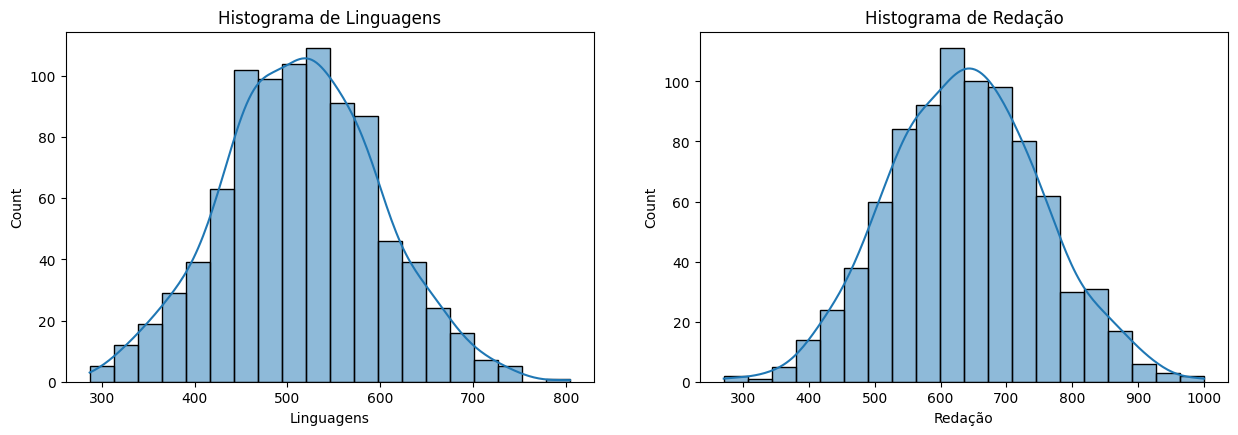

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.histplot(df_hist['Linguagens'], kde=True, bins=20)
plt.title('Histograma de Linguagens')

plt.subplot(222)
sns.histplot(df_hist['Redação'], kde=True, bins=20)
plt.title('Histograma de Redação')

#####Podemos dizer que os histogramas são simétricos, visto que os dados analisados se concentram no ponto médio do gráfico.

#### 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

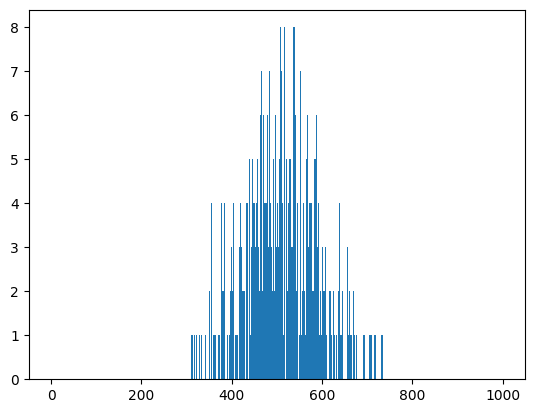

In [ ]:
# Histograma com range fixo de 0 até 1000 da disciplina Linguagens
plt.hist(df_hist['Linguagens'], bins=range(0,1000))


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

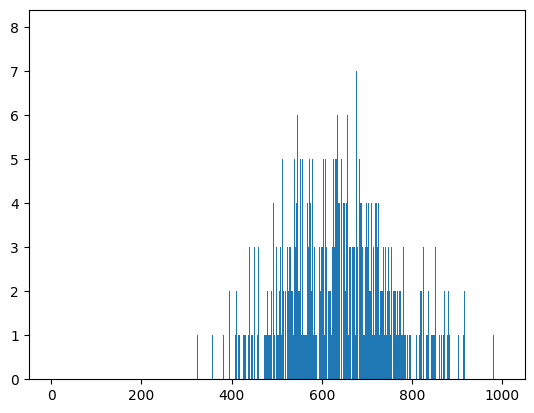

In [ ]:
# Histograma com range fixo de 0 até 1000 da disciplina Redação
plt.hist(df_hist['Redação'], bins=range(0,1001))

##### Podemos dizer que embora indique um leve deslocamento èsquerda, os histogramas são simétricos, visto que os dados analisados se concentram na média dos dados.

#### 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [ ]:
# Filtrando as disciplinas a serem analisadas pelo boxplot
df_hist = df_enem[['Ciências da natureza','Redação']]
df_hist

,Ciências da natureza,Redação
0,390.482473,546.371706
1,NaN,741.825256
2,443.183580,684.515750
3,413.979810,671.237114
4,609.758123,744.375048
...,...,...
995,511.347833,NaN
996,542.028624,715.984249
997,508.034658,798.408655
998,414.167228,593.392939


In [ ]:
# Função que identifica outliers
def func_identifica_outliers(df, col):
  Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
  IQR = Q3 - Q1
  cut_off = IQR * 1.5
  lower, upper = Q1 - cut_off, Q3 + cut_off
  df_outliers = df[(df[col] < lower) | (df[col] > upper)]
  num_outliers=df_outliers.shape[0]
  outliers=list(df_outliers[col].values)

  print(f"Número de outliers em {col} : {num_outliers} e valores: {outliers}")


In [ ]:
# Chamada à função para a disciplina Ciências da natureza
outliers=func_identifica_outliers(df_hist,'Ciências da natureza')

Número de outliers em Ciências da natureza : 3 e valores: [802.0045683513, 732.5029639878, 718.3960614586]


In [ ]:
# Chamada à função para a disciplina Redação
outliers=func_identifica_outliers(df_hist,'Redação')

Número de outliers em Redação : 4 e valores: [270.8399648605, 290.3086081677, 1000.0, 981.0165529826]


Text(0.5, 1.0, 'Bloxplot de Redação')

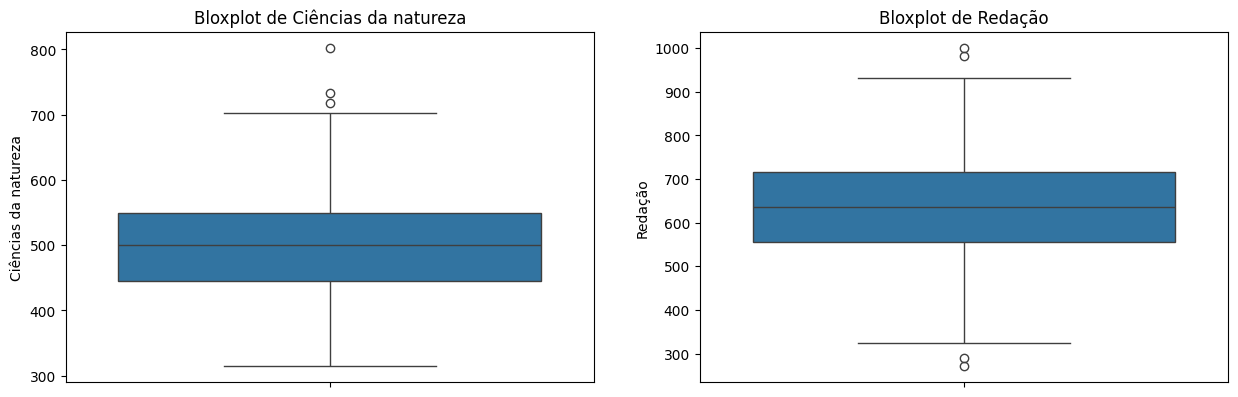

In [ ]:
# Exibição dos dois boxplots
plt.figure(figsize=(15,10))
plt.subplot(223)
sns.boxplot(df_hist['Ciências da natureza'])
plt.title('Bloxplot de Ciências da natureza')

plt.subplot(224)
sns.boxplot(df_hist['Redação'])
plt.title('Bloxplot de Redação')

#### 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# Função que remove todos os outliers do dataframe
def func_remove_outliers(df, col):
  df_temp=df.copy()
  Q1, Q3 = df_temp[col].quantile(0.25), df_temp[col].quantile(0.75)
  IQR = Q3 - Q1
  cut_off = IQR * 1.5
  lower, upper = Q1 - cut_off, Q3 + cut_off
  df_temp = df_temp.drop(df_temp[df_temp[col] < lower].index)
  df_temp = df_temp.drop(df_temp[df_temp[col] > upper].index)

  return df_temp


In [ ]:
# Chamada à função removendo os outliers da disciplina Ciências da natureza
df_temp = func_remove_outliers(df_hist,'Ciências da natureza')
df_temp['Ciências da natureza'].describe()

count    821.000000
mean     498.396025
std       77.385219
min      314.400000
25%      444.698313
50%      499.985413
75%      548.057505
max      701.813052
Name: Ciências da natureza, dtype: float64

In [ ]:
# Média nacional da disciplina Ciências da natureza
media_nacional = df_enem['Ciências da natureza'].mean()
media_nacional

499.3155828489798

In [ ]:
# Média após remoção dos outliers da disciplina Ciências da natureza
media_sem_outliers = df_temp['Ciências da natureza'].mean()
media_sem_outliers

498.3960251811956

In [ ]:
# Diferença percentual entre a média sem outliers e a média nacional.
dif_percentual = round(((media_sem_outliers - media_nacional) * 100)/media_nacional,3)
print (f"A diferença percentual entre a média após remoção de outliers da disciplina é {dif_percentual}.")

A diferença percentual entre a média após remoção de outliers da disciplina é -0.184.


In [ ]:
# Chamada à função removendo os outliers da disciplina Redação
df_temp = func_remove_outliers(df_hist,'Redação')
df_temp['Redação'].describe()

count    856.000000
mean     637.794010
std      113.029244
min      324.222553
25%      556.930700
50%      635.273973
75%      715.550093
max      931.305275
Name: Redação, dtype: float64

In [ ]:
# Média nacional da disciplina Redação
media_nacional = df_enem['Redação'].mean()
media_nacional

637.7835320695872

In [ ]:
# Média após remoção dos outliers da disciplina Redação
media_sem_outliers = df_temp['Redação'].mean()
media_sem_outliers

637.7940098759746

In [ ]:
# Diferença percentual entre a média sem outliers e a média nacional.
dif_percentual = round(((media_sem_outliers - media_nacional) * 100)/media_nacional,3)
print (f"A diferença percentual entre a média após remoção de outliers da disciplina é {dif_percentual}.")

A diferença percentual entre a média após remoção de outliers da disciplina é 0.002.


##### Após a remoção dos outliers é possível aferir que os dados são consistentes, não havendo assim uma alteração significa nos dados em comparação à média nacional.

#### 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Função que verifica percentual de valores ausentes por coluna
def valores_ausentes_por_coluna(dfcol):
    df=dfcol.select_dtypes(include=["number"])

    valores_ausentes = df.isnull().sum()

    # Porcentagem de valores ausentes
    perc_valores_ausentes = (valores_ausentes / len(df)) * 100

    media = df.mean()

    # Tipo de dado das colunas com valores ausentes
    tipo_valores_ausentes = df.dtypes

    # Criando uma tabela com os resultados
    tabela_ausentes = pd.concat([valores_ausentes, perc_valores_ausentes, media, tipo_valores_ausentes], axis=1)

    # Renomear as colunas
    tabela_ausentes_colunas = tabela_ausentes.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Média', 3: 'Tipo'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    tabela_ausentes_colunas = (tabela_ausentes_colunas[tabela_ausentes_colunas.iloc[:,0] != 0].
                               sort_values('% de Valores Ausentes', ascending = False).round(2))

    print ("Foi encontrado: " + str(tabela_ausentes_colunas.shape[0]) + " colunas que têm valores ausentes.")

    # Retorna o dataframe com informações ausentes
    return tabela_ausentes_colunas

In [ ]:
# Chamada à função de análise de valores nulos
valores_ausentes_por_coluna(df_enem)

Foi encontrado: 5 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Média,Tipo
Ciências da natureza,176,17.6,499.32,float64
Redação,140,14.0,637.78,float64
Linguagens,103,10.3,514.52,float64
Matemática,76,7.6,535.97,float64
Ciências humanas,64,6.4,527.04,float64


In [ ]:
# Definindo variável para seleção de colunas númericas
colunas_numericas=df_enem.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
# Cópias dos dataframes que receberão a imputação dos valores nulos com a mediana, a média e com a moda, respectivamente
df_mediana = df_enem.copy()
df_media = df_enem.copy()
df_moda = df_enem.copy()

In [ ]:
# Imputação dos valores nulos das colunas do dataframe com a Mediana
for col in df_mediana:
    if df_mediana[col].isnull().any():
        if(col in colunas_numericas):
            df_mediana[col]=df_mediana[col].fillna(df_mediana[col].mean())

In [ ]:
# Imputação dos valores nulos das colunas do dataframe com a Média
for col in df_media:
    if df_media[col].isnull().any():
        if(col in colunas_numericas):
            df_media[col]=df_media[col].fillna(df_media[col].mean())

In [ ]:
# Imputação dos valores nulos das colunas do dataframe com a Moda
for col in df_moda:
    if df_moda[col].isnull().any():
        if(col in colunas_numericas):
            df_moda[col]=df_moda[col].fillna(df_moda[col].mode()[0])

In [ ]:
# Cálculo da média e desvio padrão do dataframe com o valores nulos
df_enem.loc[:,"Linguagens":"Redação"].agg([np.mean,np.std]).T.rename(columns={"mean": "Média com Nulos", "std": "Desvio Padrão com Nulos"})

,Média com Nulos,Desvio Padrão com Nulos
Linguagens,514.524809,84.009313
Ciências humanas,527.042281,77.811519
Ciências da natureza,499.315583,78.760404
Matemática,535.965660,86.648100
Redação,637.783532,115.339972


In [ ]:
# Cálculo da média e desvio padrão do dataframe após imputação dos valores nulos com a mediana da disciplina
df_mediana[colunas_numericas].agg([np.mean,np.std]).T.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'})

,Média,Desvio Padrão
Linguagens,514.524809,79.560718
Ciências humanas,527.042281,75.277806
Ciências da natureza,499.315583,71.486677
Matemática,535.965660,83.286987
Redação,637.783532,106.953175


In [ ]:
# Cálculo da média e desvio padrão do dataframe após imputação dos valores nulos com a média da disciplina
df_media[colunas_numericas].agg([np.mean,np.std]).T.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'})

,Média,Desvio Padrão
Linguagens,514.524809,79.560718
Ciências humanas,527.042281,75.277806
Ciências da natureza,499.315583,71.486677
Matemática,535.965660,83.286987
Redação,637.783532,106.953175


In [ ]:
# Cálculo da média e desvio padrão do dataframe após imputação dos valores nulos com a moda da disciplina
df_moda[colunas_numericas].agg([np.mean,np.std]).T.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'})

,Média,Desvio Padrão
Linguagens,491.089754,105.439794
Ciências humanas,511.865175,95.073179
Ciências da natureza,466.770440,100.370446
Matemática,519.537070,101.100966
Redação,586.411433,166.333335


In [ ]:
print ('Os valores nulos foram substituídos, em diferentes dataframes, pela mediana, pela média e pela moda. E é possível observar que a substituição \nque altera menos a média geral e o desvio padrão é a média ou a mediana.')

Os valores nulos foram substituídos, em diferentes dataframes, pela mediana, pela média e pela moda. E é possível observar que a substituição 
que altera menos a média geral e o desvio padrão é a média ou a mediana.
